In [1]:
#Importing packages
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

c:\Users\icemo\Documents\University\Masters\Applied Machine Learning\ICS5110-Applied-Machine-Learning\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("willianoliveiragibin/healthcare-insurance")

In [3]:
#Retrieving the path to the dataset
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        path = os.path.join(dirname, filename)

In [4]:
#Displaying the first 5 rows of the dataset
df = pd.read_csv(path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Get the number of rows and columns
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  1338
Columns:  7


In [6]:
#Get the column names
print("Columns: ", df.columns.values)

Columns:  ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']


In [7]:
#Getting data types of each column
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [10]:
#Getting all unique values in a column
for column in df.columns:
    uniqueValues = df[column].unique()
    
    #Check if column is numeric
    if df[column].dtype != 'int64' and df[column].dtype != 'float64':
        print(column, ":", uniqueValues)
        print("Number of categories: ", len(uniqueValues))
        print()
    else:
        #Print the range of the values
        print(column, ":", min(uniqueValues), "-", max(uniqueValues))
        print()

age : 18 - 64

sex : ['female' 'male']
Number of categories:  2

bmi : 15.96 - 53.13

children : 0 - 5

smoker : ['yes' 'no']
Number of categories:  2

region : ['southwest' 'southeast' 'northwest' 'northeast']
Number of categories:  4

charges : 1121.8739 - 63770.42801



In [11]:
#Checking for missing values (Value is set to ? in the dataset for missing values)
print(df.isin(['?']).sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
print("Rows without missing values: ", df.dropna().shape[0])

Rows without missing values:  1338


In [13]:
dfSkewness = df.copy()

#Removing duplicate rows
dfSkewness.drop_duplicates(inplace=True)

#Removing rows with missing values
dfSkewness = dfSkewness[dfSkewness != '?']

#Converting columns to numeric
for column in dfSkewness.columns:
    if dfSkewness[column].dtype == 'object':
        #Converting values to index
        dfSkewness[column], uniques = pd.factorize(dfSkewness[column])
        dfSkewness[column] = dfSkewness[column] + 1  

In [14]:
#Checking skewness of the data
print(dfSkewness.skew())

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker     -1.463601
region      0.039068
charges     1.515391
dtype: float64


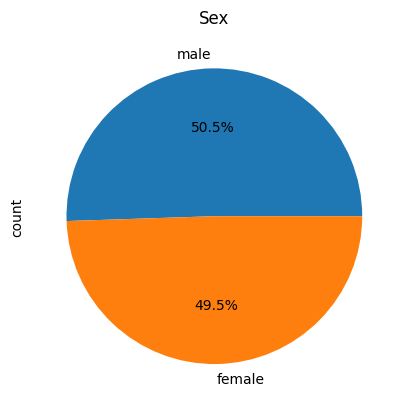

In [15]:
#Sex Pie Chart

#Displays the sex distribution in the dataset
df["sex"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sex")
plt.show()

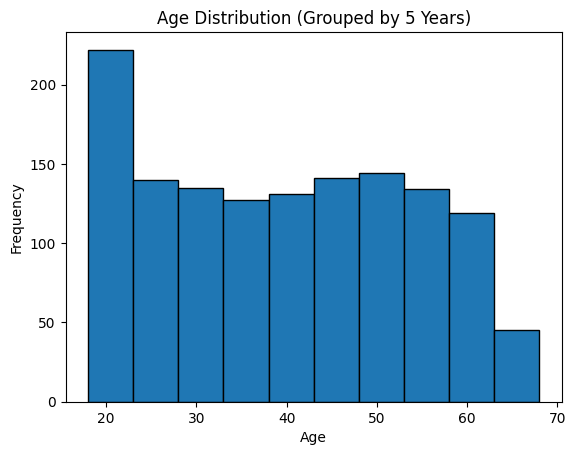

In [17]:
#Displays the age distribution in the dataset as line chart
df["age"].plot.hist(bins=range(df["age"].min(), df["age"].max() + 5, 5), edgecolor="black")
plt.title("Age Distribution (Grouped by 5 Years)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 0, 'Region')

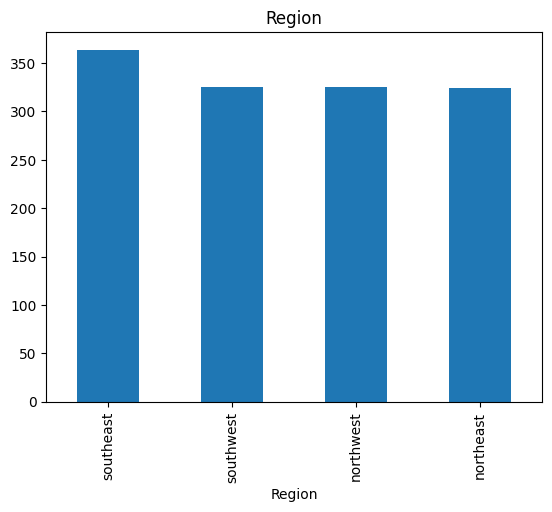

In [18]:
#Displays the nationality by frequency
df["region"].value_counts().plot.bar()
plt.title("Region")
plt.xlabel("Region")

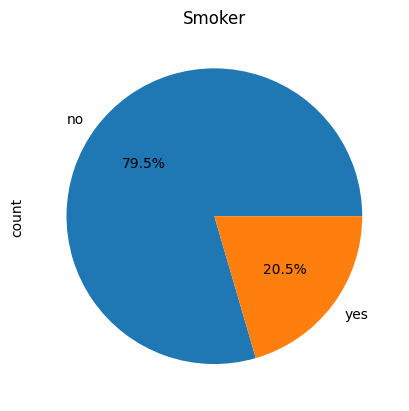

In [19]:
#Displays the smoker distribution in the dataset
df["smoker"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Smoker")
plt.show()

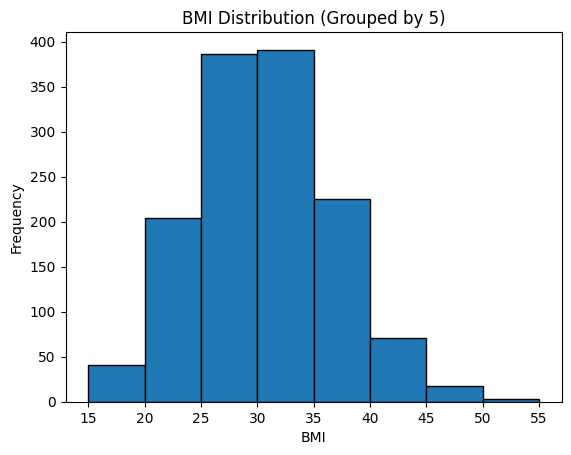

In [21]:
#Displays the bmi distribution in the dataset
df["bmi"].plot.hist(bins=range(int(df["bmi"].min()), int(df["bmi"].max()) + 5, 5), edgecolor="black")
plt.title("BMI Distribution (Grouped by 5)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

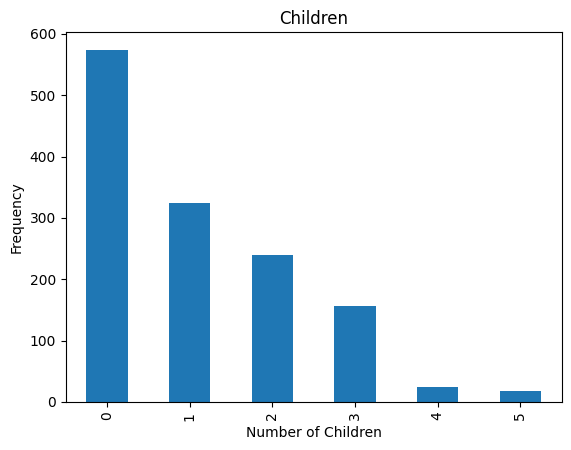

In [22]:
#Displays the children distribution in the dataset
df["children"].value_counts().plot.bar()
plt.title("Children")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()